In [1]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
name = 'pi0'
name ='twoshower'
stage=name

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

In [4]:
dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

POTS :  0.492 4.23214
MC to OnBeam :  0.11625324304
Off to OnBeam:  2.168404449


In [5]:
print df.shape

(633, 100)


In [6]:
dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id==11 or\
                 bkgd_id ==12 or bkgd_id ==13) & (pi0_low_type == 1 or pi0_high_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 6 or bkgd_id == 7 or\
                    ((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11 or\
                  bkgd_id ==12 or bkgd_id ==13) & pi0_low_type != 1 & pi0_high_type != 1)')

df_v = [cc1pi0_v,nu_EM_v,cccex_v,multpi0_v,nc1pi0_v,oth_v]

labels_0 = ['Other','$\\nu_{\mu}$ NC $\pi^0$',\
              '$\\nu_{\mu}$ CC Mult $\pi^0$','$\\nu_{\mu}$ CC CEx','$\\nu_{\mu}$ FSEM',\
              '$\\nu_{\mu}$ CC 1 $\pi^0$']
label_v = labels_0[::-1]

sample_v = ['Signal','FSEM','CCCex','Multpi0','NCpi0','Other']

In [12]:
df_cos = df.query('pi0_low_origin == 2 | pi0_high_origin == 2')

print df_cos.shape[0]

cos_shr = df.query('pi0_low_origin')

40


In [11]:
df_cos = df.query('pi0_low_origin == 2 | pi0_high_origin == 2')


df_cos = df.query('pi0_low_origin == 2 & pi0_high_origin == 2')
df_mixed = df.query('(pi0_low_origin == 2 & pi0_high_origin == 1) | (pi0_low_origin == 1 & pi0_high_origin == 2)')
df_nu = df.query('pi0_low_origin == 1 & pi0_high_origin == 1')
        
one_nupi0_v = df.query('(pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 0) | (pi0_low_from_pi0 == 0 & pi0_high_from_pi0 == 1)')
neither_nupi0_v = df.query('pi0_low_from_pi0 != 1 & pi0_high_from_pi0 != 1')

one_nupi0_one_cosmic_v = one_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1) ')

neither_nupi0_onenu_onecos_v = neither_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1)')
neither_nupi0_bothcos_v = neither_nupi0_v.query('(pi0_low_origin == 2 & pi0_high_origin == 2)')

print df_cos.shape[0]

print df_mixed.shape[0]
print one_nupi0_one_cosmic_v.shape[0]
print neither_nupi0_bothcos_v.shape[0]

10
30
22
9


In [7]:
print oth_v.bkgd_id.values
print oth_v.pi0_low_type

[ 6  7  6 12 12 12  6]
16     1.0
23     1.0
287    1.0
305    0.0
391    0.0
509    0.0
616    1.0
Name: pi0_low_type, dtype: float32


In [8]:
#def makeOriginPlots(df,var,xmin,xmax,nbins=20,xlabel=''):
def makeOriginPlots(df,nbins=20,sample='test',label='test',xlabel=''):

    var ='pi0_mass';  xmin = 0; xmax = 400
    stage='showerOriginBreakdown'
    df_cos = df.query('pi0_low_origin == 2 & pi0_high_origin == 2')
    df_mixed = df.query('(pi0_low_origin == 2 & pi0_high_origin == 1) | (pi0_low_origin == 1 & pi0_high_origin == 2)')
    df_nu = df.query('pi0_low_origin == 1 & pi0_high_origin == 1')
        
    both_nupi0_v = df.query('pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 1')
    one_nupi0_v = df.query('(pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 0) | (pi0_low_from_pi0 == 0 & pi0_high_from_pi0 == 1)')
    neither_nupi0_v = df.query('pi0_low_from_pi0 != 1 & pi0_high_from_pi0 != 1')

    one_nupi0_both_nu_v = one_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
    one_nupi0_one_nushr_v = one_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
    one_nupi0_one_nutrk_v = one_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type==0) | (pi0_low_type == 0 & pi0_high_type == 1) ')

    one_nupi0_one_cosmic_v = one_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1) ')

    neither_nupi0_both_nu_v = neither_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
    neither_nupi0_both_nushr_v = neither_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
    neither_nupi0_oneshr_onetrk_v = neither_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type == 0) | (pi0_low_type == 0 & pi0_high_type == 1)')
    neither_nupi0_both_nutrk_v = neither_nupi0_both_nu_v.query('pi0_low_type == 0 & pi0_high_type == 0')

    neither_nupi0_onenu_onecos_v = neither_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1)')
    neither_nupi0_bothcos_v = neither_nupi0_v.query('(pi0_low_origin == 2 & pi0_high_origin == 2)')

    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    
    lgd = 0
    
    labels_tst = ['2 $\\nu$ track','1 $\\nu$ shower, 1 $\\nu$ track','2 $\\nu$ showers',\
                  '1 $\pi^0$ shower,1 $\\nu$ track','1 $\pi^0$ shower,1 $\\nu$ shower','2 $\pi^0$ shower']
    colors_tst = ['yellow','purple','green','lightskyblue','darkblue','salmon'] 

    #labels_tst = ['Cosmic','Mixed','$\\nu$']
    #colors_tst = ['lightgrey','blue','salmon'] 
    fig,ax = plt.subplots(figsize=(8,6))
    
    ax.hist([neither_nupi0_both_nutrk_v[var].values,\
             neither_nupi0_oneshr_onetrk_v[var].values,neither_nupi0_both_nushr_v[var].values,\
             one_nupi0_one_nutrk_v[var].values,one_nupi0_one_nushr_v[var].values,both_nupi0_v[var].values],bins=nbins,label=labels_tst,\
            color=colors_tst,ec='None',stacked=True,\
        range=(xmin,xmax),rwidth=bin_width,histtype='stepfilled')
    #ax.hist([df_cos[var].values,df_mixed[var].values,df_nu[var].values],bins=nbins,label=labels_tst,color=colors_tst,ec='None',stacked=True,\
    #    range=(xmin,xmax),rwidth=bin_width,histtype='stepfilled')

    handles,labels = ax.get_legend_handles_labels()

    lgd = plt.legend(handles=handles,fontsize=12,loc=0)
    
    #plt.legend(loc=0,fontsize=14)
    plt.grid(True)
    plt.title('Contribution of %s to Mass Peak'%label,fontsize=18,weight='bold')
    plt.title('%s'%label,fontsize=18,weight='bold')

    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_%s_%s.png'%(stage,sample,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

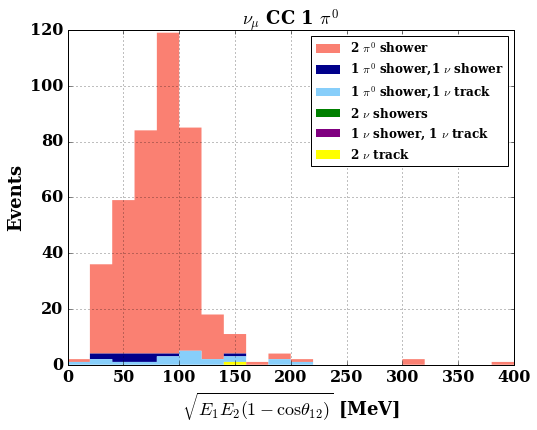

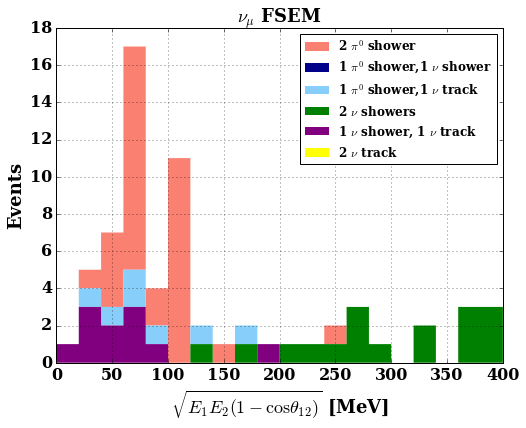

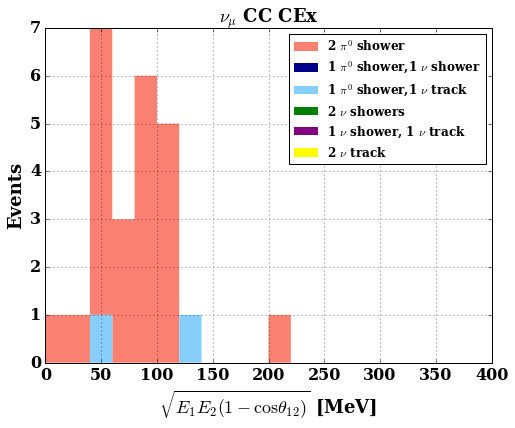

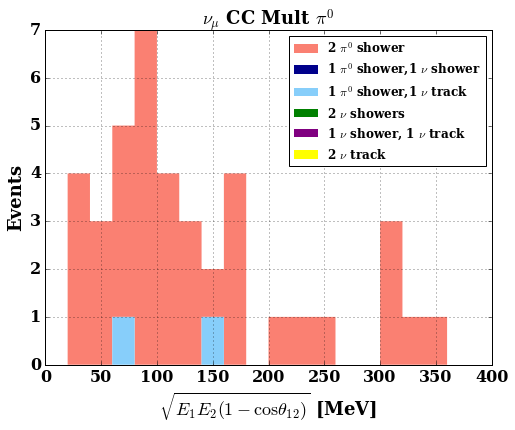

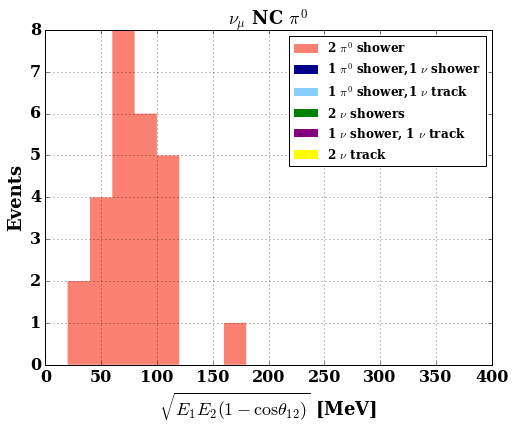

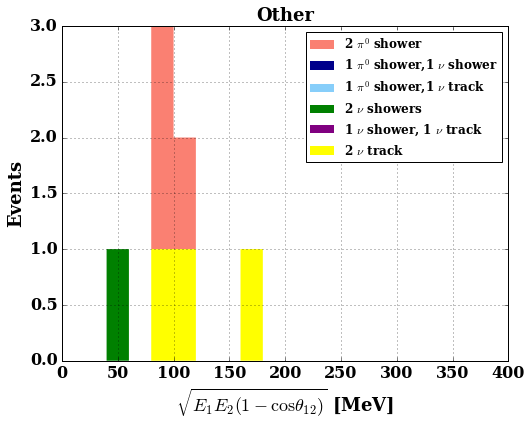

In [9]:
for i in xrange(len(df_v)):
    makeOriginPlots(df_v[i],sample=sample_v[i],label=label_v[i],xlabel='$\sqrt{E_1 E_2 (1-\cos\\theta_{12})}$ [MeV]')
    

In [13]:
name = 'singleshower'
#name = 'pi0'
#name = 'sel2'
stage=name

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

In [14]:
#print df.info()

In [16]:
dfa = df.query('gamma_origin != 2')

cos_v = df.query('bkgd_id == 1 or gamma_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id==11 or\
                 bkgd_id ==12 or bkgd_id ==13) & (gamma_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 6 or bkgd_id == 7 or\
                    ((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11 or\
                  bkgd_id ==12 or bkgd_id ==13) & gamma_type != 1)')

df_v = [cc1pi0_v,nu_EM_v,cccex_v,multpi0_v,nc1pi0_v,oth_v]

labels_0 = ['Other','$\\nu_{\mu}$ NC $\pi^0$',\
              '$\\nu_{\mu}$ CC Mult $\pi^0$','$\\nu_{\mu}$ CC CEx','$\\nu_{\mu}$ FSEM',\
              '$\\nu_{\mu}$ CC 1 $\pi^0$']
label_v = labels_0[::-1]

sample_v = ['Signal','FSEM','CCCex','Multpi0','NCpi0','Other']

In [23]:
cos_shr = cos_v.query('gamma_type == 1')
cos_trk = cos_v.query('gamma_type == 0')

print 'Selected Single Shower Events: ',df.shape
print 'Total Cosmic Events: ', cos_v.shape
print 'Cosmic Shower Events: ',cos_shr.shape
print 'Cosmic Track Events: ', cos_trk.shape


Selected Single Shower Events:  (2167, 91)
Total Cosmic Events:  (138, 91)
Cosmic Shower Events:  (120, 91)
Cosmic Track Events:  (18, 91)


In [49]:
def make1ShowerOriginPlots(df,nbins=12,sample='test',label='test',xlabel=''):

    var ='gamma_E';  xmin = 0; xmax = 500
    stage='showerOriginBreakdown_1gamma'
    
    trk_nu_v = df.query('gamma_type == 0 & gamma_origin == 1')
    shr_pi0_nu_v = df.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 1')
    shr_nopi0_nu_v = df.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 0')
    noise_v = df.query('gamma_type == -1')

    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]

    lgd = 0
    
    labels_tst = ['Noise','$\\nu$ track','$\\nu$ shower','$\pi^0$ shower']
    colors_tst = ['black','darkgreen','lightskyblue','salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    
    ax.hist([noise_v[var].values,\
            trk_nu_v[var].values,shr_nopi0_nu_v[var].values,shr_pi0_nu_v[var].values],\
            bins=nbins,label=labels_tst,color=colors_tst,ec='None',stacked=True,\
            range=(xmin,xmax),rwidth=bin_width,histtype='stepfilled')

    handles,labels = ax.get_legend_handles_labels()

    lgd = plt.legend(handles=handles,fontsize=12,loc=0)
    
    #plt.legend(loc=0,fontsize=14)
    plt.grid(True)
    #plt.title('Energy Distribution of %s Events'%label,fontsize=18,weight='bold')
    plt.title('%s'%label,fontsize=18,weight='bold')
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_%s_%s.png'%(stage,sample,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

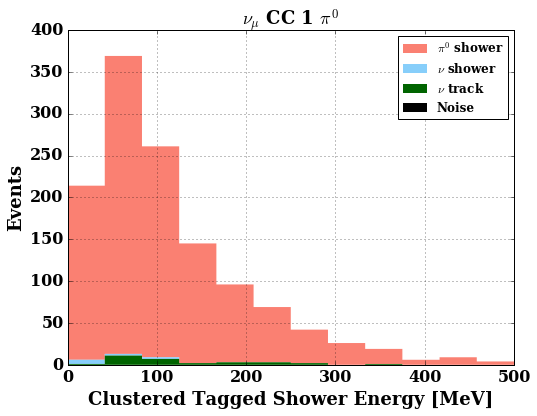

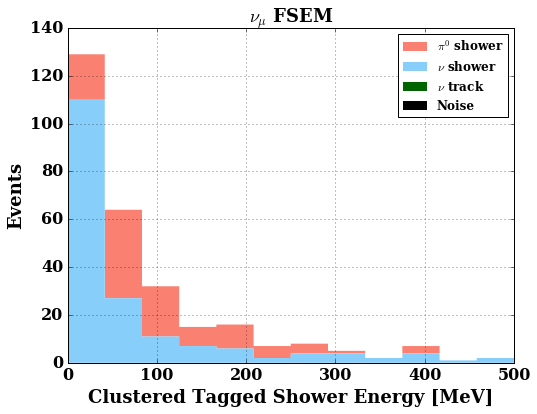

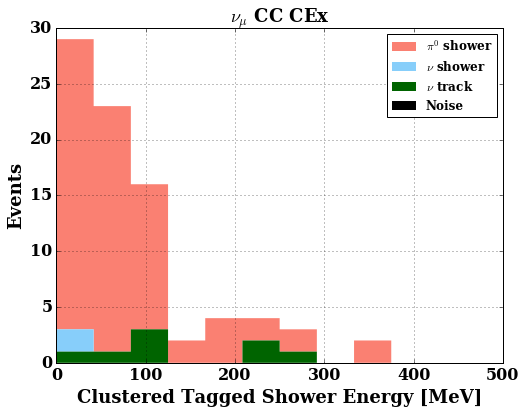

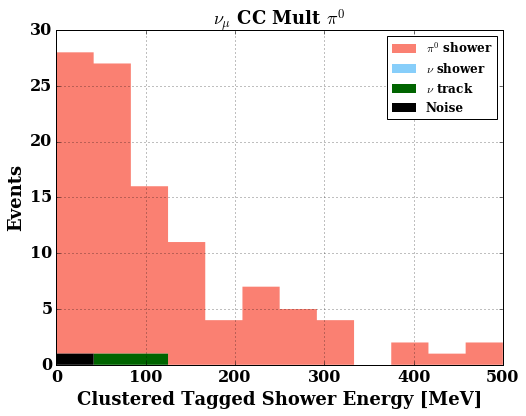

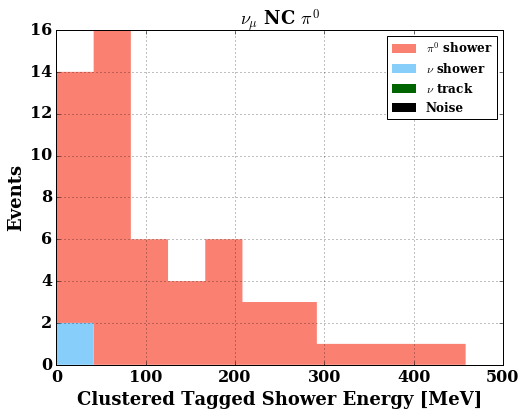

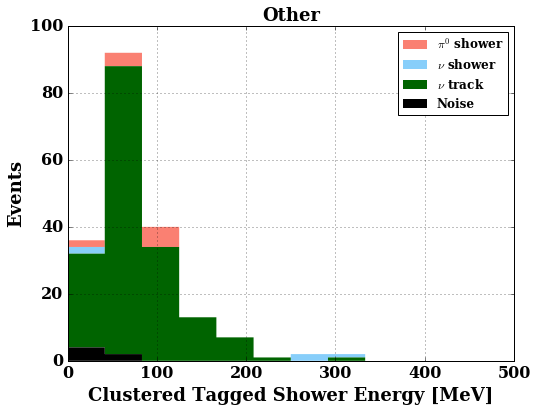

In [50]:
for i in xrange(len(df_v)):
    make1ShowerOriginPlots(df_v[i],sample=sample_v[i],label=label_v[i],xlabel='Clustered Tagged Shower Energy [MeV]')

## AND NSHOWERS

In [17]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
bnb='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_sel2_showersOnly.root'

c = rn.root2array(bnb,treename='tree')
df2 = pd.DataFrame(c)

stage='showerOriginBreakdown_nshrs'

In [19]:
# bnb = 'Files/BT_backgrounds_sel2_showersOnly.root'
# c = rn.root2array(bnb,treename='shower_tree')
# df = pd.DataFrame(c)
#df2 = df2.query('nshrs > 0')
#test = df.groupby(['event','shr_origin']).size().reset_index(name='counts')

In [20]:
df2_1shr = df2.query('nshrs == 1')
df2_2shr = df2.query('nshrs == 2')
df2_3shr = df2.query('nshrs == 3')
df2_4shr = df2.query('nshrs == 4')
df2_5shr = df2.query('nshrs == 5')
df2_6shr = df2.query('nshrs == 6')
df2_7shr = df2.query('nshrs == 7')

In [24]:
dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT

#cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
#all_w = [mc_to_onbeam for i in xrange(df2.shape[0])]

In [22]:
xmin = 1; xmax = 7
nbins = 6

def nShrBackgrounds(df_i,nshr,loc=0):
    x_bnb, y_bnb = np.histogram(df2['nshrs'].values,bins=nbins,range=(xmin,xmax))    
    bnbcos_m = x_bnb * mc_to_onbeam 
    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]

    labels_tst = ['Cosmic ($\\nu$)','Noise','$\\nu$ track','$\\nu$ shower','$\pi^0$ shower']
    colors_tst = ['lightgrey','black','darkgreen','lightskyblue','salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    ax.hist([df_i.n_shr_cosmic.values,df_i.n_shr_noise.values,
        df_i.n_shr_nutrk.values,df_i.n_shr_nushr.values,df_i.n_shr_pi0.values],\
        bins=nbins,label=labels_tst,color=colors_tst,ec='None',stacked=True,\
        range=(xmin,xmax),rwidth=bin_width,histtype='stepfilled')

    plt.legend(loc=loc,fontsize=11)
    plt.grid(True)
    plt.xlabel('Shower Origins for %s Shower Events'%nshr[0],fontsize=18,weight='bold')
    plt.ylabel('Events',fontsize=18,weight='bold')
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_%s.png'%(stage,nshr)) ##,bbox_extra_artists=(lgd,), bbox_inches='tight')

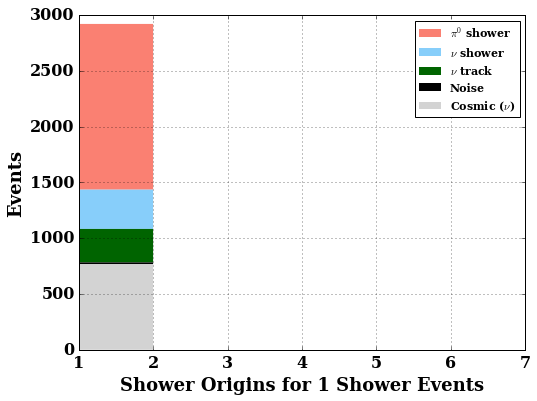

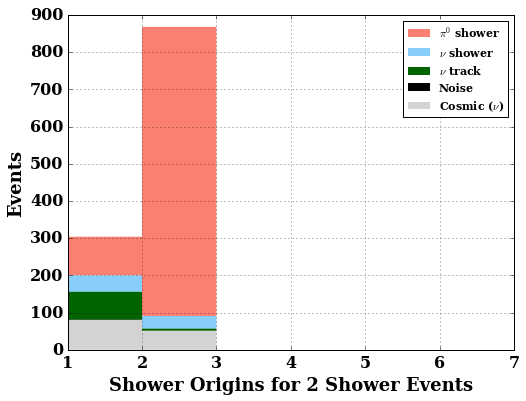

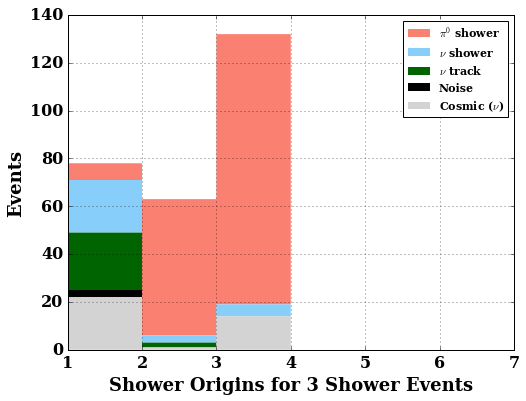

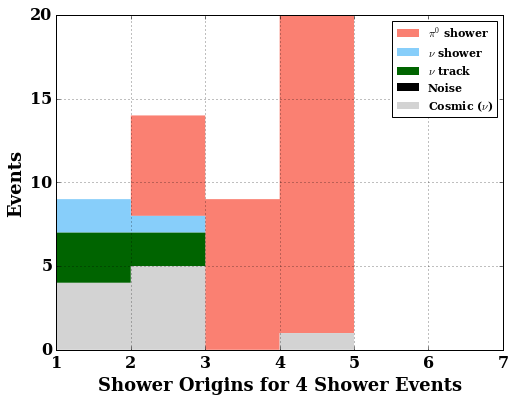

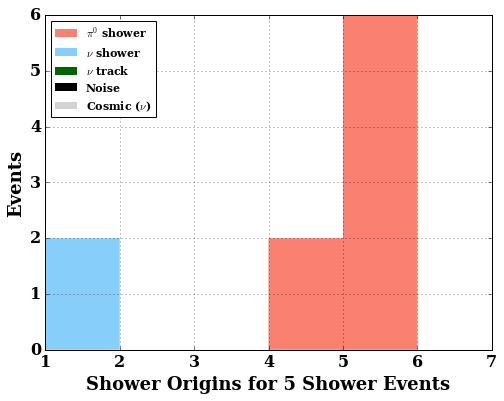

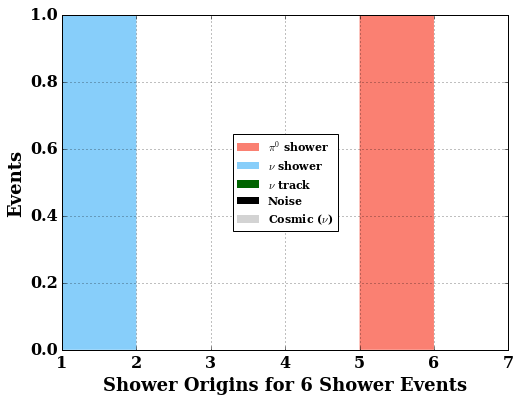

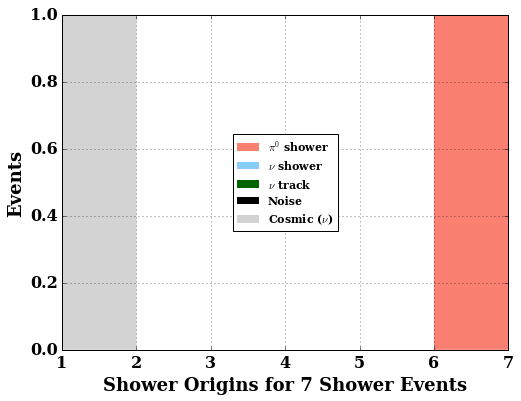

In [23]:
nShrBackgrounds(df2_1shr,'1shr')
nShrBackgrounds(df2_2shr,'2shr')
nShrBackgrounds(df2_3shr,'3shr')
nShrBackgrounds(df2_4shr,'4shr')
nShrBackgrounds(df2_5shr,'5shr',loc=2)
nShrBackgrounds(df2_6shr,'6shr',loc=10)
nShrBackgrounds(df2_7shr,'7shr',loc=10)

In [ ]:
#df.info()
noise_v = df.query('shr_type == -999')

cos_v = df.query('shr_origin == 2 & shr_type != -999 ')
nu_v = df.query('shr_origin == 1 & shr_type != -999 ')
trk_nu_v = df.query('shr_origin == 1 & shr_type == 0')
shr_nu_v = df.query('shr_origin == 1 & shr_type == 1 & shr_from_pi0 == 0')
pi0_nu_v = df.query('shr_origin == 1 & shr_type == 1 & shr_from_pi0 == 1')

cos_v = cos_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
noise_v = noise_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
trk_nu_v = trk_nu_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
shr_nu_v = shr_nu_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
pi0_nu_v = pi0_nu_v.groupby(['event','shr_origin']).size().reset_index(name='counts')

noise_w  = [ mc_to_onbeam for i in xrange(noise_v.shape[0]) ] 
cos_w    = [ mc_to_onbeam for i in xrange(cos_v.shape[0]) ] 
trk_nu_w = [ mc_to_onbeam for i in xrange(trk_nu_v.shape[0]) ] 
shr_nu_w = [ mc_to_onbeam for i in xrange(shr_nu_v.shape[0]) ] 
pi0_nu_w = [ mc_to_onbeam for i in xrange(pi0_nu_v.shape[0]) ] 


In [8]:
bnb = 'Files/BT_backgrounds_sel2_showersOnly.root'
c = rn.root2array(bnb,treename='shower_tree')
df = pd.DataFrame(c)

oth_v = df.query('bkgd_id == 0') #noise
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
nc1pi0_v = df.query('bkgd_id == 3')
cc1pi0_outFV_v = df.query('bkgd_id == 4')
multpi0_v = df.query('bkgd_id == 5')
nue_v = df.query('bkgd_id == 6')
antinumu_v = df.query('bkgd_id == 7')
cccex_v = df.query('bkgd_id == 8 ')
nccex_v = df.query('bkgd_id == 9')
ccgamma_v = df.query('bkgd_id == 10')
kaon_v = df.query('bkgd_id == 11')
ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')


oth_v = oth_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
cos_v = cos_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
cc1pi0_v = cc1pi0_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
nc1pi0_v = nc1pi0_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
cc1pi0_outFV_v = cc1pi0_outFV_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
multpi0_v = multpi0_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
nue_v = nue_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
antinumu_v = anitnumu_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
cccex_v = cccex_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
nccex_v = nccex_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
ccgamma_v = ccgamma_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
kaon_v = kaon_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
ccoth_v = ccoth_v.groupby(['event','shr_origin']).size().reset_index(name='counts')
ncoth_v = ncoth_v.groupby(['event','shr_origin']).size().reset_index(name='counts')

dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on
#print d

var = 'counts'
#var = 'bkgd_id'

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
cc1pi0_outFV_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_outFV_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
nue_w = [ mc_to_onbeam for i in xrange(len(nue_v[var].values)) ] 
antinumu_w = [ mc_to_onbeam for i in xrange(len(antinumu_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nccex_w = [ mc_to_onbeam for i in xrange(len(nccex_v[var].values)) ] 
ccgamma_w = [ mc_to_onbeam for i in xrange(len(ccgamma_v[var].values)) ] 
kaon_w = [ mc_to_onbeam for i in xrange(len(kaon_v[var].values)) ] 
ccoth_w = [ mc_to_onbeam for i in xrange(len(ccoth_v[var].values)) ] 
ncoth_w = [ mc_to_onbeam for i in xrange(len(ncoth_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 


IOError: unable to access tree 'shower_tree' in Files/BT_backgrounds_sel2_showersOnly.root

In [262]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel=''):


    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df2[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off) *off_to_on
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)

    #print mc_to_onbeam
    #print err_off
    #print err_mc
    #print err_mc_off
    
    weights = [cos_ext_w,cos_w,antinumu_w,nue_w,multpi0_w,cc1pi0_outFV_w,ncoth_w,nc1pi0_w,ccoth_w,cccex_w,\
           ccgamma_w,sig_w]
    
    lgd = 0
    
    labels_tst = ['Cosmic - In Time (Data)','Cosmic - $\\nu$ Coincident','anti $\\nu_{\mu}$','$\\nu_e$',\
                  'Mult $\pi^0$','CC 1-$\pi^0$ OutFV',\
                  'NC 0$\pi^0$','NC $\pi^0$',\
                 'CC Other','CC Cex','N-$\gamma$','Signal']

    labels_tst = ['Cosmic (Data)','Cosmic ($\\nu$)','anti $\\nu_{\mu}$','$\\nu_e$',\
                  'Mult $\pi^0$','CC 1-$\pi^0$ OutFV',\
                  'NC 0$\pi^0$','NC $\pi^0$',\
                 'CC Other','CC Cex','N-$\gamma$','Signal']

    
    colors_tst = ['lightgrey','dimgrey','darkgoldenrod','yellow','mediumpurple','purple','lime','darkgreen','lightskyblue','blue',\
                 'darkblue','salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    var = 'counts'
    ax.hist([df1['nshrs'].values,cos_v[var].values,antinumu_v[var].values,nue_v[var].values,\
        multpi0_v[var].values,cc1pi0_outFV_v[var].values,\
        ncoth_v[var].values,nc1pi0_v[var].values,\
        ccoth_v[var].values,cccex_v[var].values,ccgamma_v[var].values,\
        cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='OnBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,1))
    
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    #plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

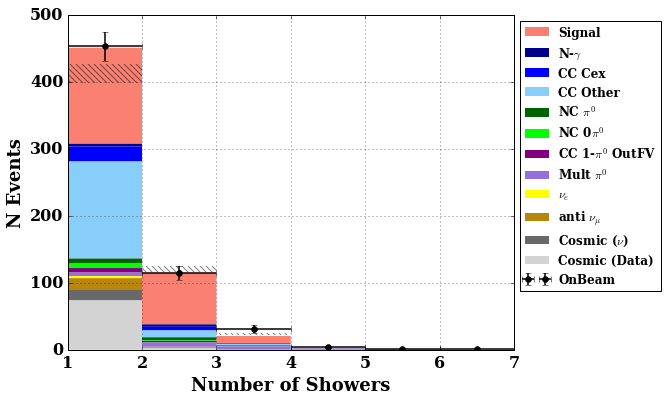

In [263]:
makeOnOffPlots('nshrs',1,7,nbins=6,xlabel='Number of Showers')